In [59]:
#由于对时间的把控和对画图工具极不熟悉，本次作业没能完成，做的稀里糊涂的，可能助教看起来也很费劲，能给多少分给多少分吧，吸取教训下次早点开始。
#第一题
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
Sig_Eqs=pd.read_csv('earthquakes-2022-10-28_09-18-54_+0800.tsv',sep='\t')
#去掉没有数据的第一行
Sig_Eqs =Sig_Eqs.drop([0])
Sig_Eqs
Sig_Eqs['country']=Sig_Eqs['Location Name'].str.split(':').str.get(0)
Sig_Eqs
Sig_Eqs.groupby('country')['Total Deaths'].sum()


country
AFGHANISTAN                                      11636.0
AFGHANISTAN-TAJIKISTAN                               1.0
AFGHANISTAN; INDIA                                   0.0
AFGHANISTAN; PAKISTAN                                6.0
AFGHANISTAN; TAJIKISTAN                              0.0
ALABAMA                                              0.0
ALASKA                                             319.0
ALASKA PENINSULA                                     0.0
ALBANIA                                           2826.0
ALGERIA                                          39339.0
ANATAHAN REGION, N. MARIANA ISLANDS                  0.0
ANTARCTICA                                           0.0
ANTIGUA AND BARBUDA; ST KITTS                        0.0
ANTIGUA ISLAND &  ST. CHRISTOPHER                    0.0
ANTIGUA; SAINT KITTS AND NEVIS                       0.0
ARGENTINA                                        14520.0
ARKANSAS                                             0.0
ARMENIA                

<AxesSubplot:xlabel='Year'>

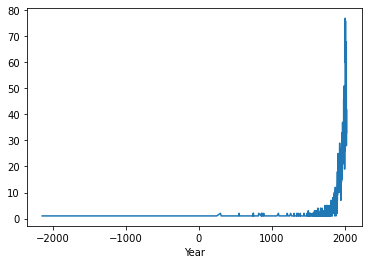

In [105]:
#1.2
import pandas as pd
Sig_Eqs
Sig_Eqs['Mag']=Sig_Eqs['Mag'].astype(float)
Ms=Sig_Eqs[Sig_Eqs['Mag']>3].groupby('Year')['Mag'].count()
Ms.plot()
#得到的趋势是每年检测到的震级大于三级的地震数目，在公元前前数目基本不增加，在大约300-1500年开始出现缓慢增加在大约1600年后开始出现显著增加，
#并在20世纪后的增加速度显著加快，这是因为在最开始地震是由经受地震的人所记载的，这时人类分布的范围小，可能只有受灾可能性也小，记载就相对不足
#随后因为人口增加，居住范围更广泛，遭受的地震更多，被记载的地震也就更多，到了20实际，地震开始由受灾监测模式改为仪器检测模式，覆盖全球的地震
#都可以被检测到，所以也就开始出现检测数目激增的情况。

In [116]:
#1.3(没做出来)
Sig_Eqs['for_count']=1
Sig_Eqs.groupby('country')['for_count'].sum()
Sig_Eqs.groupby('country')['Mag'].max()


country
AFGHANISTAN                                    8.1
AFGHANISTAN-TAJIKISTAN                         6.4
AFGHANISTAN; INDIA                             7.5
AFGHANISTAN; PAKISTAN                          6.3
AFGHANISTAN; TAJIKISTAN                        6.1
ALABAMA                                        4.6
ALASKA                                         9.2
ALASKA PENINSULA                               8.2
ALBANIA                                        7.5
ALGERIA                                        7.1
ANATAHAN REGION, N. MARIANA ISLANDS            4.4
ANTARCTICA                                     7.5
ANTIGUA AND BARBUDA; ST KITTS                  7.5
ANTIGUA ISLAND &  ST. CHRISTOPHER              NaN
ANTIGUA; SAINT KITTS AND NEVIS                 8.0
ARGENTINA                                      7.8
ARKANSAS                                       7.5
ARMENIA                                        6.8
ARMENIA-AZERBAIJAN-IRAN                        6.0
ARMENIA; AZERBAIJAN    

C:\Users\86135\AppData\Local\Temp\ipykernel_39116\1472572609.py:5: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  met=pd.read_csv('Baoan_Weather_1998_2022.csv')


<AxesSubplot:xlabel='Date'>

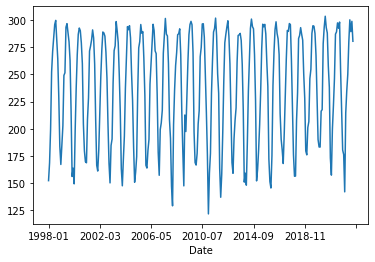

In [191]:
#第二题
#TMP的列中有两个数据，逗号前面的是气温数据，逗号后面的是对这个数字可信程度的判断，当逗号前的数据为+999时表示该数据丢失，应将其移除，逗号后的数字
#为0和1时表明该数据真实可信，逗号后数字为2是表示该数据可能出现问题，逗号后数字为3时表示该数据是错误的，逗号后数字为4和5表示该数据正确但并非实测，
#而是来自NCEI数据库，逗号后数字为6表示该数据来自NCEI数据库且可能不对。在处理时首先应将逗号后数字为9和3的数据删除，
met=pd.read_csv('Baoan_Weather_1998_2022.csv')
met.head()
#首先把TMP中的数据拆分成温度列和判断数字列，然后将其转化为int格式，后面用于删除数据
met['temperature']=met['TMP'].str.split(',').str.get(0)
met['define']=met['TMP'].str.split(',').str.get(1)
met['define']=met['define'].astype(int)
met['tem']=met['temperature'].str.split('+').str.get(1)
met['tem']=met['tem'].astype(int)
#对前面说的，判断数字为3和9的参数进行删除
met = met.drop(met[met['define']==9].index)
met = met.drop(met[met['define']==3].index)
#将时间序列中的年和月拆出来重组成为一列具有年和月信息的列
met['year']=met['DATE'].str.split('-').str.get(0)
met['month']=met['DATE'].str.split('-').str.get(1)
met["Date"]= met['year'] + '-' + met['month']
#根据拆出来的年和月求每个月的气温平均值
met2=met.groupby('Date')['tem'].mean()
met2.plot()
#图中每一个峰大致代表一年的数据，以峰脚（1月）和峰顶（7，8月份）来看，在这25年中，宝安的月平均气温，尤其是一月的月平均气温总体呈现升高趋势。




In [329]:
#第三题
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()
#3.1没看懂题目啥意思，是要找到10个最大风速，然后把SID和NAME提取出来？还是说根据这两个因素分组后排序？可是分组之后就不能再排序了,先排序的话
#再分组要干啥呢？
df2=df.sort_values('WMO_WIND',ascending=False)[0:10]
df3=df2.groupby('NAME')['SID'].count()
df3

C:\Users\86135\AppData\Local\Temp\ipykernel_39116\3376994072.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


NAME
BART       1
BOBBY      1
BONITA     1
CARINA     1
FABIO      1
RICK       1
ROXANNE    1
SONGDA     1
Name: SID, dtype: int64

In [333]:
3.2#麻烦助教至少让我知道这东西bug在哪
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df2=df.sort_values('WMO_WIND',ascending=False)[0:20]
df3 = df2.set_index('NAME')
df3['WMO_WIND'].plot()

C:\Users\86135\AppData\Local\Temp\ipykernel_39116\2109543342.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


TypeError: no numeric data to plot

<AxesSubplot:xlabel='BASIN'>

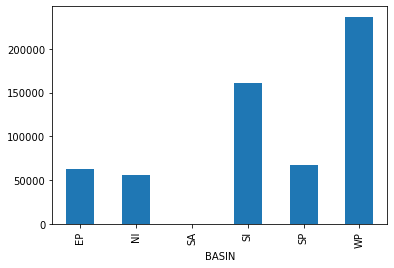

In [274]:
#3.3
df['number']=1
df4=df.groupby('BASIN')['number'].sum()
df4.plot(kind="bar")

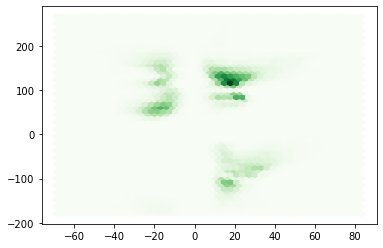

In [280]:
#3.4
x = df['LAT'] 
y = df['LON']     
plt.hexbin(x, y, gridsize = 50, cmap ='Greens')  
plt.show() 


<AxesSubplot:xlabel='LON'>

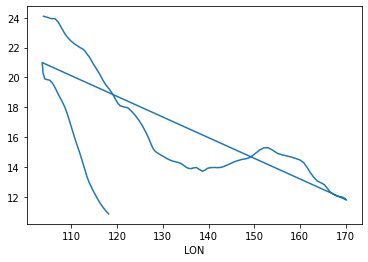

In [344]:
#3.5 
df.head()
df2=df.loc[df['NAME']=='MANGKHUT']
df3 = df2.set_index('ISO_TIME')
df3=df2.set_index('LON')
df3['LAT'].plot()

In [315]:
#第四题:数据来自 Advanced Global Atmospheric Gases Experiment (AGAGE)网站
#4.1
my_data=pd.read_excel('em-cfc——11.xls')
my_data
my_data = my_data.drop(columns=['Unnamed: 3'])
my_data = my_data.drop(columns=['Unnamed: 7'])
my_data = my_data.drop(columns=['Unnamed: 11'])
my_data = my_data.drop(columns=['Unnamed: 15'])
my_data = my_data.drop(columns=['Unnamed: 19'])
my_data

,Table 1:,Production and Atmospheric Release,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 6,Expanded Data,Unnamed: 9,Unnamed: 10,Reporting Companies only,Unnamed: 13,Unnamed: 14,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,CFC-11,(thousand metric tonnes),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(thousand metric tonnes),NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Cumulative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Annual,NaN,Total,NaN,NaN,Refrigeration hermetic,NaN,NaN,Refrigeration NON-hermetic,NaN,NaN,Blowing Agents Closed Cell Foam,NaN,NaN,"Open Cell Foam, Aerosols & Others",NaN,NaN
3,NaN,Production,Released,Production,Released,Unreleased,Sales,Released,Unreleased,Sales,Released,Unreleased,Sales,Released,Unreleased,Sales,Released,Unreleased
4,1931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1934,0.045675,0.003825,0.045675,0.003825,0.04185,0,0,0,0.045,0.00315,0.04185,0,0,0,0.000675,0.000675,0
8,1935,0.045675,0.007875,0.09135,0.0117,0.07965,0,0,0,0.09,0.01035,0.07965,0,0,0,0.00135,0.00135,0
9,1936,0.092365,0.018535,0.183715,0.030235,0.15348,0,0,0,0.181,0.02752,0.15348,0,0,0,0.002715,0.002715,0
